CNN

In [38]:

import pandas as pd
import numpy as np
from Keras.models import Sequential
from keras.layers import Dense
print('kera version: ', keras.__version__)

kera version:  2.15.0


In [49]:
#datos

dataset= pd.read_csv('./dataset/dataset_5man_5girl_20repGesto_512dim.csv')
dataset

C:\Users\user\AppData\Local\Temp\ipykernel_10520\3241052804.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset= pd.read_csv('./dataset/dataset_5man_5girl_20repGesto_512dim.csv')


,pd,time,ch1,ch2,ch3,ch4,ch5,ch6,tag,ID
0,0,0,0.633826,0.59199,0.512991,0.968018,0.223058,0.950284,0.0,1.0
1,1,4,0.649024,0.639468,0.501742,0.583785,0.333358,0.444996,0.0,1.0
2,2,8,0.647639,0.651658,0.459478,0.28756,0.911474,0.165396,0.0,1.0
3,3,12,0.640552,0.619407,0.472027,0.57666,0.899768,0.513566,0.0,1.0
4,4,16,0.625848,0.580593,0.514235,0.941218,0.310728,0.938194,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
409659,��9��8&�9Rz�D���B��YG� ���>b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409660,:� @�2!��4(i?�,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409661,�6H��?�u���!Lzzl�PU�c�5�A�/V�`L`z�Pn�1�p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409662,"�W�d�o�\t3Pͅ ��mś�l�����/���m��(""e(9��8�񅼦ۛ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#obtener valores que quiero
dataset.iloc[:404883,2:8].values #todos los valores en filas, los valores de ch1 - ch6

#guardarlos en variable
#data_x = dataset.iloc[:404883,2:8].values

#para prueba datos de 10
data_x = dataset.iloc[:10,2:8].values
data_x = np.array(data_x, dtype=np.float32) #comvertirlos en arreglos para que sea compatible con tensoflow


#data_y = dataset.iloc[:404883,-2].values
#para prueba datos de 10
data_y = dataset.iloc[:10,-1].values
data_y = np.array(data_y, dtype=np.float32)
data_y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [84]:
#Estructura de red neuronal de forma secuencial
model = Sequential()

In [85]:
model.add(Dense(12, activation="relu", input_dim=6 ))

In [86]:
#capa oculta
model.add(Dense(4, activation="relu"))

In [87]:
#capa salida
model.add(Dense(1,activation="sigmoid"))

In [88]:
model.compile(
    loss="binary_crossentropy",
    optimizer ='adam',
    metrics=['accuracy']
)

In [95]:
historial = model.fit(data_x, data_y, batch_size=20, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 21ms/step - loss: 1.8079e-04 - accuracy: 1.0000
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 1.8058e-04 - accuracy: 1.0000
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 1.8036e-04 - accuracy: 1.0000
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 1.8015e-04 - accuracy: 1.0000
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 1.7994e-04 - accuracy: 1.0000
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 1.7972e-04 - accuracy: 1.0000
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 1.7951e-04 - accuracy: 1.0000
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 1.7930e-04 - accuracy: 1.0000
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 1.7909e-04 - accuracy: 1.0000
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 1.7887e-04 - acc

In [91]:
#visualizar

import matplotlib.pyplot as plt

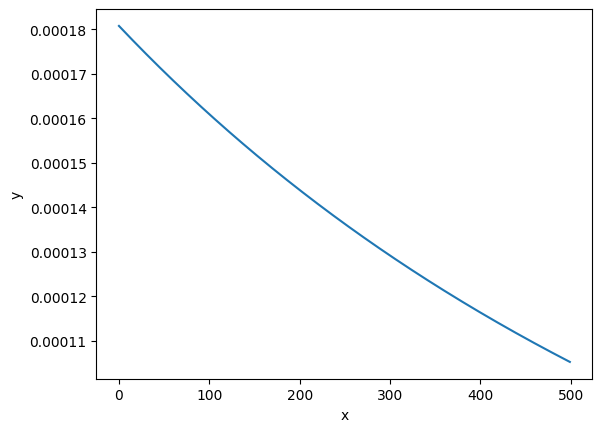

In [96]:
plt.xlabel("x")
plt.ylabel("y")

plt.plot(historial.history['loss'])

In [97]:
#modelo de prediccion

model.evaluate(data_x, data_y)

1/1 [==============================] - 0s 182ms/step - loss: 1.0510e-04 - accuracy: 1.0000


[0.00010510308493394405, 1.0]

In [98]:
predcit_y = model.predict(data_x)
predcit_y

1/1 [==============================] - 0s 156ms/step


array([[0.99997896],
       [0.9998574 ],
       [0.99981725],
       [0.9999644 ],
       [0.9999807 ],
       [0.99986607],
       [0.99979335],
       [0.9999552 ],
       [0.9997534 ],
       [0.9999823 ]], dtype=float32)

In [102]:
resultados = pd.DataFrame(np.round(predcit_y),columns=["Predict"])
resultados

,Predict
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [107]:
resultados['Real'] = pd.Series(predcit_y[:, 0])
resultados

,Predict,Real
0,1.0,0.999979
1,1.0,0.999857
2,1.0,0.999817
3,1.0,0.999964
4,1.0,0.999981
5,1.0,0.999866
6,1.0,0.999793
7,1.0,0.999955
8,1.0,0.999753
9,1.0,0.999982
